asset.py notebook

This notebooks demonstrates the basic structure and behavior of the asset module.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from labellines import labelLines

from canteen.asset import Asset, Depreciation

The asset module, defines an `Asset` class that represents a depreciable asset. This class is composed of:

1. `values`: Dataclass containing the asset's current, full(initial) value, and salvage value.
2. `lifetime`: Dataclass containing functional age, and useful life of the asset in years or "units of production".
3. `depreciation`: Functions that convert asset age to value and value to age.

In [2]:
asset = Asset()
print(asset)

Asset(values=Values(salvage=0.0, initial=100.0, current=100.0), lifetime=Lifetime(useful_life=100.0, functional_age=0.0, lifetime_units=<LifeTimeUnits.TIME: 'time'>), depreciation=<canteen.asset.Depreciation object at 0x000002099A7AFD40>)


Deprecation as a function of the shape parameter, k.

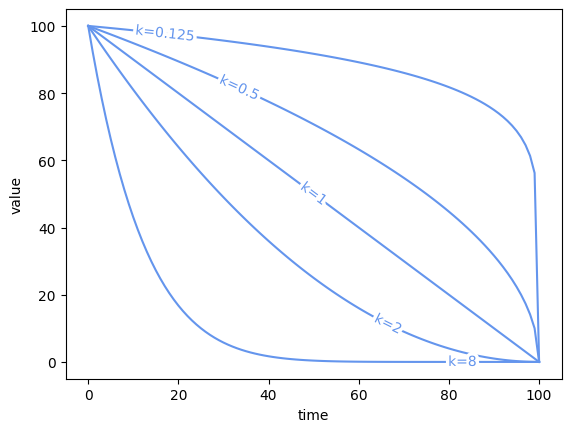

In [3]:
xs = list(range(0, 101))
ks = [0.125, 0.5, 1, 2, 8]
fxs = [Depreciation(k) for k in ks]
for fx in fxs:
    ys = [fx.age_to_value(asset, t) for t in xs]
    plt.plot(xs, ys, label=f"k={fx._shape_parameter}", color='cornflowerblue')
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.xlabel("time")
plt.ylabel("value")
plt.show()

In [ ]:
# link maintenance cost to depreciation
# link deprecation to loss of performance or failure rate.
# then move to lattice.

Depreciation is linear for shape parameter, $k=1$. For shape parameters, $k{\lt}1$ depreciation starts slowly and accelerates near the end of the asset's useful life, defined by the periods_in_schedule parameter. For shape parameters, $k{\gt}1$ the opposite is true, i.e. depreciation is front loaded.

For $k{\ne}0$, the ft() function above is invertable

An asset follows the depreciation schedule presented above if the required maintenance is performed. When less than the required maintenance is performed, this is models as an acceleration of the depreciation schedule. For instance,

>Suppose an asset requires 1 unit of maintenance each year to maintain the linear depreciation schedule for k=1. In t=0 the asset value=1.0, if the required maintenance is performed in t=1 the asset value=0.99. However, if 0 units of maintenance are provided then in t=1 the asset value will be 0.98 (the value from the original depreciation schedule associated with t=2). If 0.5 units of maintenance are performed in t=1 the asset experiences 1.5 time periods of depreciation (e.g. 1 schedule time period of deprecaition and 0.5 units of unschedule depreciation since only 50% of the schedule maintenance was performed), thus its value will be 0.985.

The example below shows how the asset depreciates if no maintenance is performed, and how it would depreciate if all schedule maintenace were performed.

In [ ]:
ts = list(range(101))
maintenance_levels = [0, 0.25, 0.5, 0.75, 1]
colors = sns.color_palette('husl', len(maintenance_levels))

for i, x in enumerate(maintenance_levels):
    asset = Asset()
    ys = [asset.value]
    for t in ts[1:]:
        asset = asset.depreciate(x)
        ys.append(asset.value)
    plt.plot(ts, ys, label=f"maintenance={x}", color=colors[i])
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.show()

This part needs some work on k.